In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


<a id = '1'></a>
## Python Libraries

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msg

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from IPython.display import IFrame
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn import tree
import warnings
warnings.filterwarnings("ignore")


<a id = '3'></a>
## Reading and Analyzing the Data

In [36]:
water_quality = pd.read_csv("water_potability.csv")
df = water_quality.copy()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
df["Potability"].value_counts()

,count
Potability,
0,1998
1,1278


In [38]:
#describe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [39]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [40]:
#d = pd.DataFrame(df["Potability"].value_counts())
#fig = px.pie(d, values = "count", names = ["Not Potable", "Potable"],
#            hole = 0.35, opacity = 0.8, labels = {"label": "Potability", "Potability": "Number of Samples"})
#fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
#fig.update_traces(textposition = "outside", textinfo = "percent+label")
#fig.write_html("pie.html")
#IFrame("pie.html", width = 900, height = 600)

In [41]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


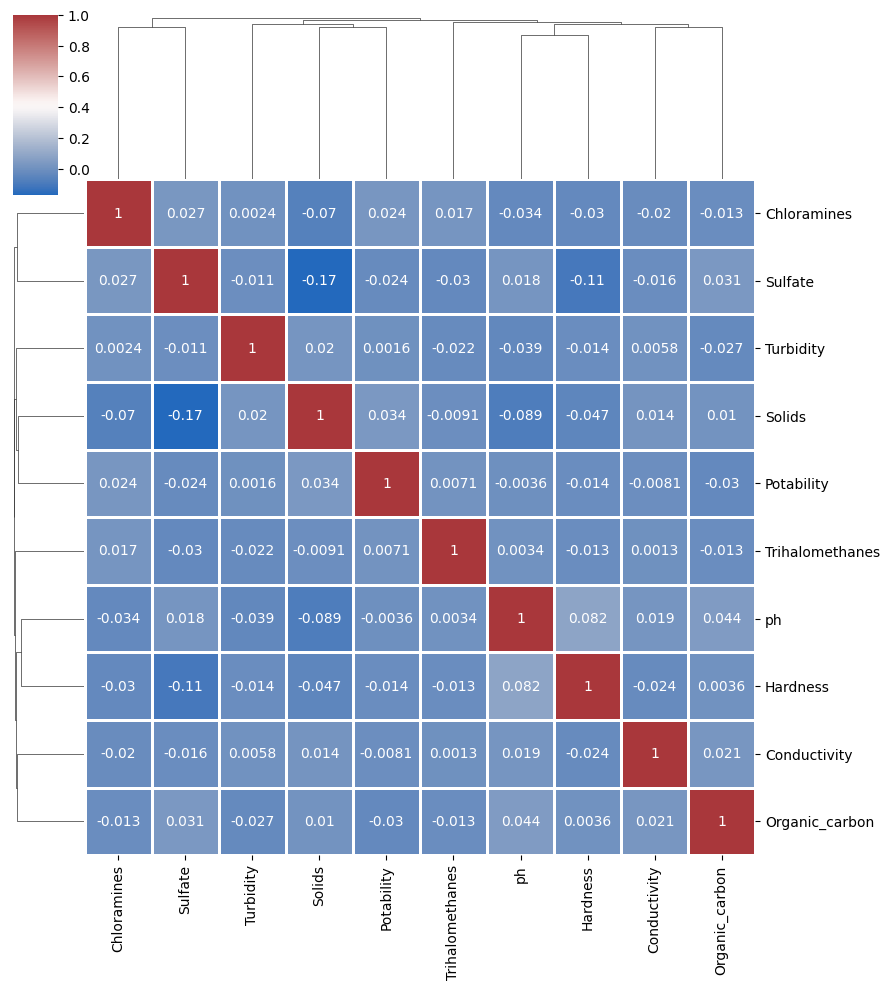

In [42]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True,
              linewidths = 0.8, figsize = (9, 10))
plt.show()

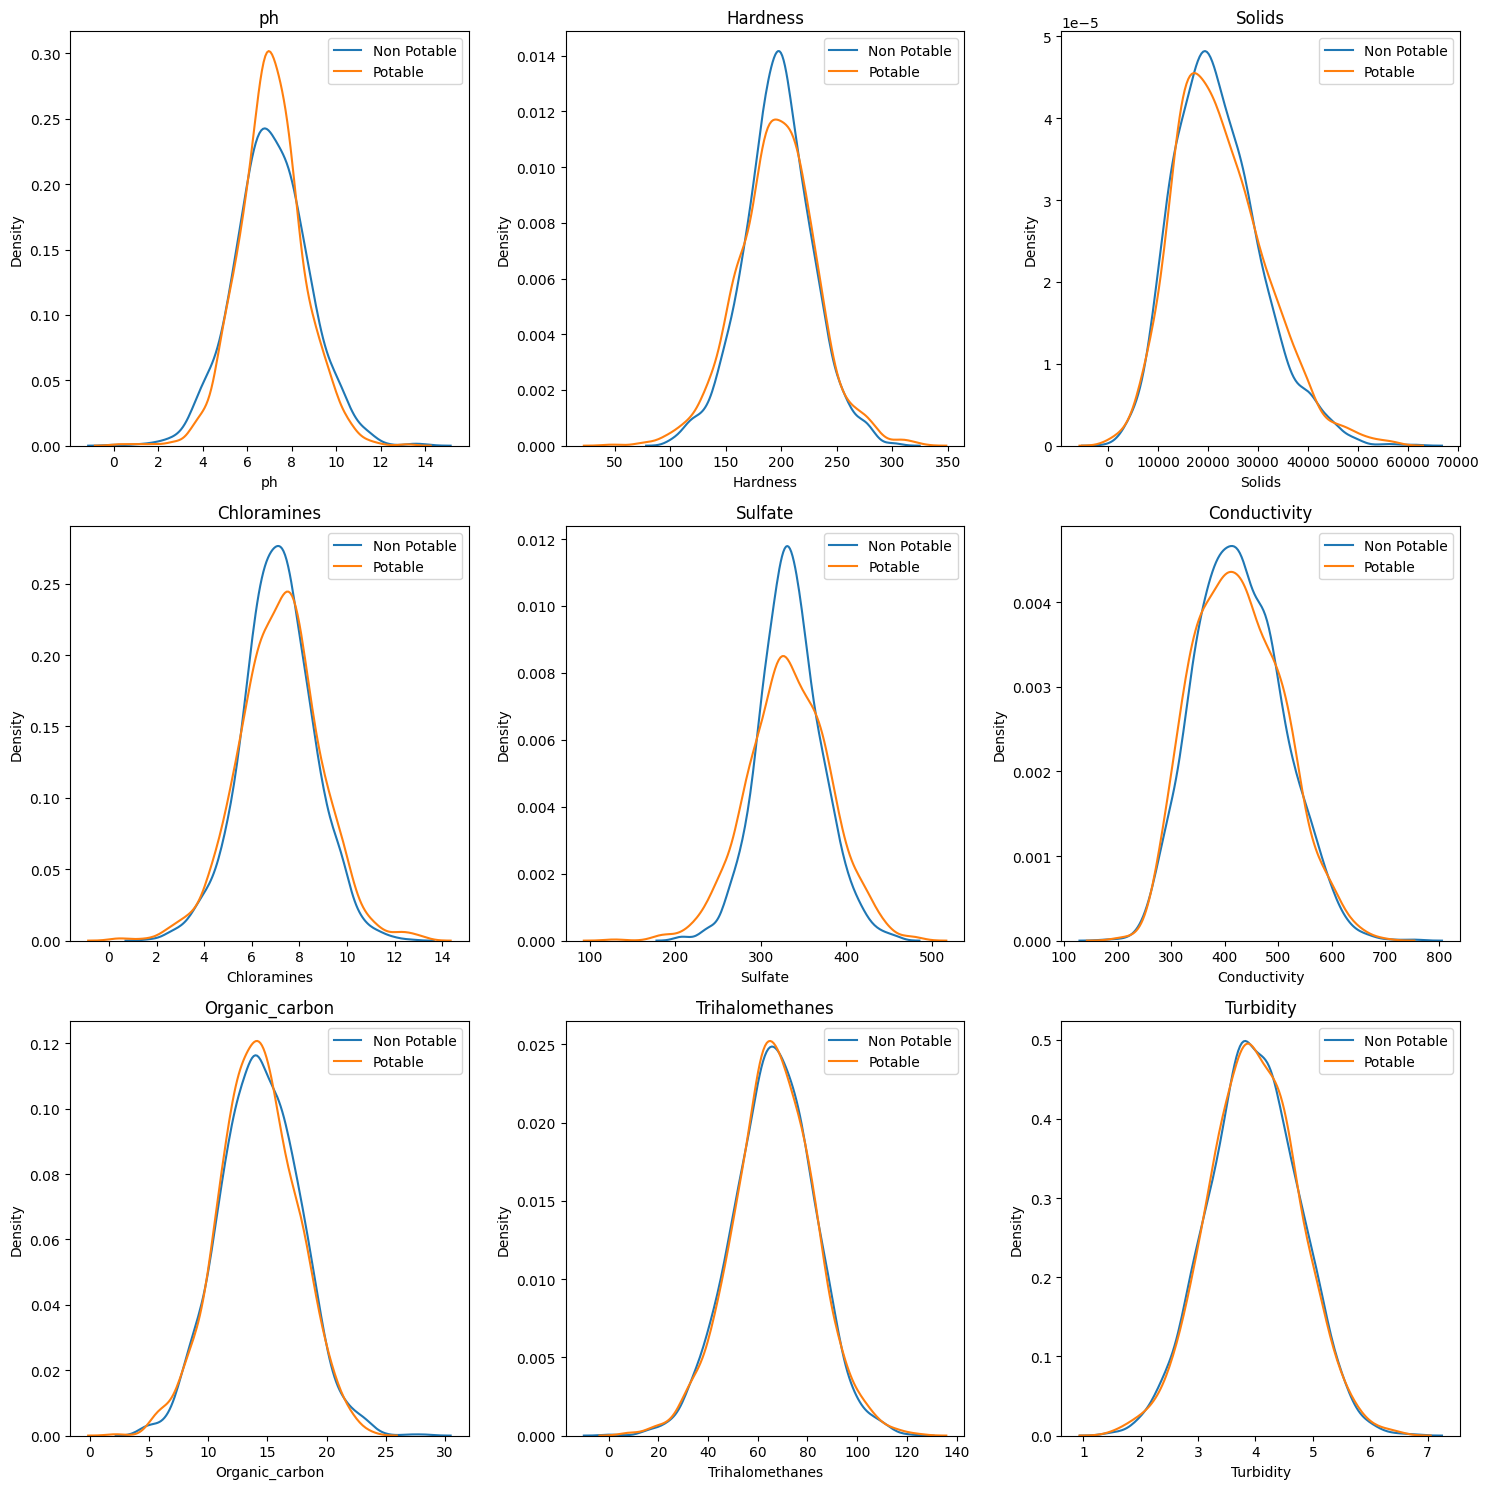

In [43]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15, 15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

In [44]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [45]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [46]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


<a id = '8'></a>
## Train-Test Split and Normalization

In [47]:
x = df.drop("Potability", axis = 1).values
y = df["Potability"].values


In [48]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("x_train => ",x_train.shape)
print("x_test => ", x_test.shape)
print("y_train => ", y_train.shape)
print("y_test => ", y_test.shape)

x_train =>  (2293, 9)
x_test =>  (983, 9)
y_train =>  (2293,)
y_test =>  (983,)


In [49]:
#min-max normalization
x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = (x_train - x_train_min) / (x_train_max - x_train_min)
x_test = (x_test - x_train_min) / (x_train_max - x_train_min)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
models = [("DTC", DecisionTreeClassifier()), ("LR", LogisticRegression()), ("SVC", SVC()),
         ("KNN", KNeighborsClassifier()), ("RFC", RandomForestClassifier())]

In [ ]:
from sklearn.metrics import classification_report

In [55]:
for i in models:
  i[1].fit(x_train, y_train)
  ypred=i[1].predict(x_test)
  print(i[0])
  print(classification_report(y_test, ypred))
  print("-------------------------------")

DTC
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       617
           1       0.41      0.48      0.44       366

    accuracy                           0.55       983
   macro avg       0.53      0.54      0.53       983
weighted avg       0.57      0.55      0.56       983

-------------------------------
LR
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983

-------------------------------
SVC
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Model named as 'rf'

# Train the model
rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred_rf)

# Store final result with the model name as "RF"
final_result = [("RF", report)]

# Print results in the requested format
print("Final Result:\n")
print(f"Model: RF\n")
print(report)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm_rf)


Final Result:

Model: RF

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983


Confusion Matrix:
 [[547  70]
 [236 130]]


In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("water_potability.csv")

# Handle missing values if necessary (replace with suitable imputation if needed)
df = df.dropna()

# Split into features (X) and target (y)
X = df.drop(columns=["Potability"])
y = df["Potability"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Save the model
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# Save the scaler to apply the same transformation in Streamlit
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model saved successfully!")
